In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 88s 42us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 16s 29us/step


In [7]:
train_labels[10]

3

In [9]:
#Encoding the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
#model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
#compiling the model
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [13]:
#setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
#training a model
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 883us/step - loss: 2.5321 - acc: 0.4959 - val_loss: 1.7226 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 2s 279us/step - loss: 1.4490 - acc: 0.6870 - val_loss: 1.3502 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 278us/step - loss: 1.0998 - acc: 0.7641 - val_loss: 1.1726 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 2s 279us/step - loss: 0.8721 - acc: 0.8138 - val_loss: 1.0803 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 296us/step - loss: 0.7050 - acc: 0.8472 - val_loss: 0.9845 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 2s 288us/step - loss: 0.5682 - acc: 0.8799 - val_loss: 0.9409 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 280us/step - loss: 0.4613 - acc: 0.9033 - val_loss: 0.9094 - val_acc: 0.8000


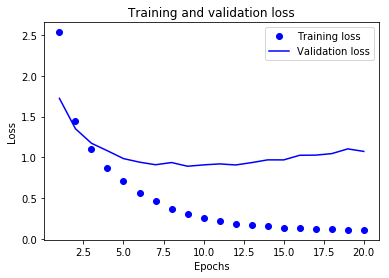

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

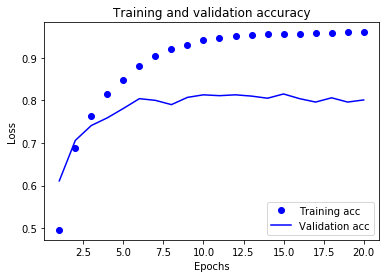

In [17]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 350us/step - loss: 2.5397 - acc: 0.5224 - val_loss: 1.6733 - val_acc: 0.6550
Epoch 2/9
7982/7982 [==============================] - 2s 276us/step - loss: 1.3712 - acc: 0.7120 - val_loss: 1.2744 - val_acc: 0.7230
Epoch 3/9
7982/7982 [==============================] - 2s 268us/step - loss: 1.0134 - acc: 0.7790 - val_loss: 1.1304 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 2s 269us/step - loss: 0.7974 - acc: 0.8257 - val_loss: 1.0524 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 2s 275us/step - loss: 0.6390 - acc: 0.8636 - val_loss: 0.9747 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 2s 278us/step - loss: 0.5117 - acc: 0.8923 - val_loss: 0.9096 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 2s 269us/step - loss: 0.4118 - acc: 0.9147 - val_loss: 0.8918 - val_acc: 0.8210
Epoch 8

In [19]:
results

[1.0243938945811026, 0.7751558326443496]

In [20]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [21]:
predictions = model.predict(x_test)

In [22]:
predictions[0].shape

(46,)

In [23]:
np.sum(predictions[0])

1.0000001

In [24]:
np.argmax(predictions[0])

3

In [25]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [26]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])